In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

In [57]:
#set path to project folder
import sys
sys.path.append('C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2')

In [3]:
# Import the required functions or classes from the module
from src.data.datapreprocess import DataProcessor

# Create an instance of the DataProcessor class
data_processor = DataProcessor()


### Data Prepration

In [110]:
df_train = pd.read_csv('C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/data/raw/sales_train.csv')

In [111]:
df_test = pd.read_csv('C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/data/raw/sales_test.csv')

In [120]:
dates_data =  pd.read_csv('C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/data/raw/calendar.csv', parse_dates=['date'])

In [124]:
price_data = pd.read_csv('C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/data/raw/items_weekly_sell_prices.csv')

In [112]:
df = pd.concat([df_train, df_test], axis=1)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [115]:
# Specify the columns to melt from df_stores_train
 # Select columns having days as d_num
dept_sales = df.columns[6:] 

In [116]:
df = pd.melt(df, id_vars=['store_id','cat_id', 'item_id'], value_vars= dept_sales,
        var_name='Day',value_name='Sales')


In [118]:
df.head()

,store_id,cat_id,item_id,Day,Sales
0,CA_1,HOBBIES,HOBBIES_1_001,d_1,0
1,CA_1,HOBBIES,HOBBIES_1_002,d_1,0
2,CA_1,HOBBIES,HOBBIES_1_003,d_1,0
3,CA_1,HOBBIES,HOBBIES_1_004,d_1,0
4,CA_1,HOBBIES,HOBBIES_1_005,d_1,0


In [122]:
# left join on sales_data and dates_data on column 'Day'
df_merge = pd.merge(df, dates_data[['d', 'date', 'wm_yr_wk']], left_on='Day', right_on='d', how='left')

In [123]:
df_merge.head()

,store_id,cat_id,item_id,Day,Sales,d,date,wm_yr_wk
0,CA_1,HOBBIES,HOBBIES_1_001,d_1,0,d_1,2011-01-29,11101
1,CA_1,HOBBIES,HOBBIES_1_002,d_1,0,d_1,2011-01-29,11101
2,CA_1,HOBBIES,HOBBIES_1_003,d_1,0,d_1,2011-01-29,11101
3,CA_1,HOBBIES,HOBBIES_1_004,d_1,0,d_1,2011-01-29,11101
4,CA_1,HOBBIES,HOBBIES_1_005,d_1,0,d_1,2011-01-29,11101


In [130]:
# Merge df1 and df2 on common columns
df_1= df_merge.merge(price_data, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')

# Calculate revenue by multiplying Sales and sell_price
df_1['revenue'] = df_1['Sales'] * df_1['sell_price']

In [131]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 0 to 59181089
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   store_id    object        
 1   cat_id      object        
 2   item_id     object        
 3   Day         object        
 4   Sales       int64         
 5   d           object        
 6   date        datetime64[ns]
 7   wm_yr_wk    int64         
 8   sell_price  float64       
 9   revenue     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 4.9+ GB


In [133]:
df_revenue = df_1[['date', 'revenue']]

In [134]:
# Group by 'date' and sum 'revenue' within each group
df_revenue = df_revenue.groupby('date')['revenue'].sum().reset_index()

In [135]:
df_revenue.shape

(1941, 2)

In [136]:
# save the DataFrame to a file named "final_revenue_data.csv"
df_revenue.to_csv('final_revenue_data.csv', index=False)

### Load the dataset

In [3]:
df_sales_revenue = pd.read_csv("C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/data/processed/final_revenue_data.csv", parse_dates=['date'])

In [4]:
df_sales_revenue.head(10)

,date,revenue
0,2011-01-29,81650.61
1,2011-01-30,78970.57
2,2011-01-31,57706.91
3,2011-02-01,60761.20
4,2011-02-02,46959.95
5,2011-02-03,69377.38
6,2011-02-04,68789.06
7,2011-02-05,93447.75
8,2011-02-06,83497.56
9,2011-02-07,65164.70


In [5]:
df_sales_revenue.shape

(1941, 2)

In [6]:
df_sales_revenue.head()

,date,revenue
0,2011-01-29,81650.61
1,2011-01-30,78970.57
2,2011-01-31,57706.91
3,2011-02-01,60761.20
4,2011-02-02,46959.95


In [7]:
df_sales_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1941 non-null   datetime64[ns]
 1   revenue  1941 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.5 KB


In [8]:
df_sales_revenue.count()

date       1941
revenue    1941
dtype: int64

In [9]:
df_sales_revenue.set_index('date',inplace=True)

In [10]:
df_sales_revenue.describe()

,revenue
count,1941.000000
mean,98700.435878
std,24366.126733
min,23.680000
25%,82427.690000
50%,96497.110000
75%,114056.920000
max,191941.730000


In [11]:
df_sales_revenue.head()

,revenue
date,
2011-01-29,81650.61
2011-01-30,78970.57
2011-01-31,57706.91
2011-02-01,60761.20
2011-02-02,46959.95


In [12]:
df_train_data = df_sales_revenue[0:1541]
df_test_data = df_sales_revenue[1541:]


In [251]:
# series to np array
series_revenue = df_train_data.values
test_val = df_test_data.values

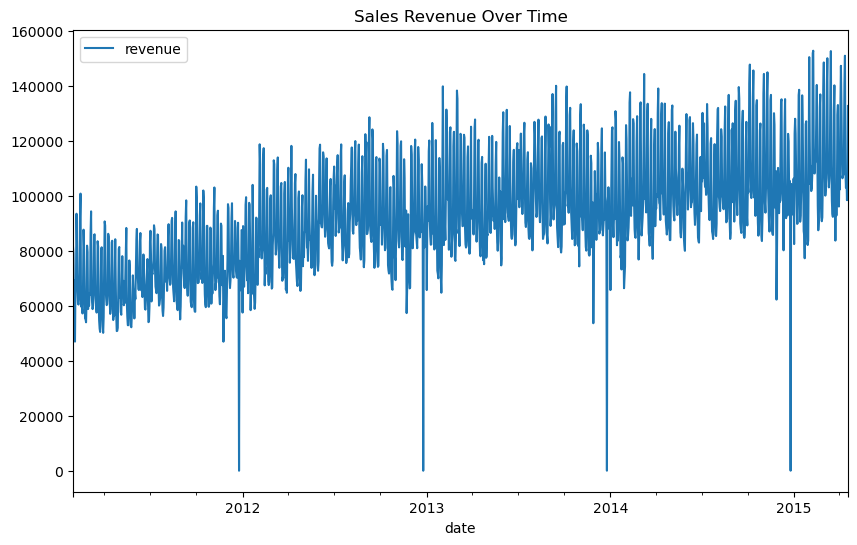

In [13]:
# Plot the revenue data with a specified figure size
df_train_data.plot(figsize=(10, 6))
plt.title('Sales Revenue Over Time')
plt.show()

In [14]:
# Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [15]:
test_result = adfuller(df_train_data['revenue'])

Null Hypothesis: It is non-stationary.


Alternative Hypothesis: It is stationary. 

In [16]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [17]:
adfuller_test(df_train_data['revenue'])

ADF Test Statistic : -1.610774560498905
p-value : 0.4775690336449283
#Lags Used : 24
Number of Observations Used : 1516
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing


### Training Set

In [18]:
df_train_data['revenue first difference'] = df_train_data['revenue'] - df_train_data['revenue'].shift(1)

In [19]:
df_train_data['revenue'].shift(1)

date
2011-01-29          NaN
2011-01-30     81650.61
2011-01-31     78970.57
2011-02-01     57706.91
2011-02-02     60761.20
                ...    
2015-04-14    108344.86
2015-04-15    102896.92
2015-04-16    106913.88
2015-04-17     98373.49
2015-04-18    103030.58
Name: revenue, Length: 1541, dtype: float64

In [20]:
df_train_data.head()

,revenue,revenue first difference
date,,
2011-01-29,81650.61,NaN
2011-01-30,78970.57,-2680.04
2011-01-31,57706.91,-21263.66
2011-02-01,60761.20,3054.29
2011-02-02,46959.95,-13801.25


In [21]:
# Dickey-Fuller test 
adfuller_test(df_train_data['revenue first difference'].dropna())

ADF Test Statistic : -15.733714221538598
p-value : 1.2802577769283383e-28
#Lags Used : 24
Number of Observations Used : 1515
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [22]:
df_train_data['weekly first difference'] = df_train_data['revenue'] - df_train_data['revenue'].shift(7)


In [23]:
# Dickey-Fuller test 
adfuller_test(df_train_data['weekly first difference'].dropna())

ADF Test Statistic : -19.79012446312711
p-value : 0.0
#Lags Used : 23
Number of Observations Used : 1510
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [24]:
df_train_data.head(9)

,revenue,revenue first difference,weekly first difference
date,,,
2011-01-29,81650.61,NaN,NaN
2011-01-30,78970.57,-2680.04,NaN
2011-01-31,57706.91,-21263.66,NaN
2011-02-01,60761.20,3054.29,NaN
2011-02-02,46959.95,-13801.25,NaN
2011-02-03,69377.38,22417.43,NaN
2011-02-04,68789.06,-588.32,NaN
2011-02-05,93447.75,24658.69,11797.14
2011-02-06,83497.56,-9950.19,4526.99


In [25]:
df_train_data['weekly second difference'] = df_train_data['revenue'] - df_train_data['revenue'].shift(14)


In [26]:
# Dickey-Fuller test 
adfuller_test(df_train_data['weekly second difference'].dropna())

ADF Test Statistic : -8.949868415216844
p-value : 8.782872592043642e-15
#Lags Used : 24
Number of Observations Used : 1502
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [27]:
df_train_data.head(20)

,revenue,revenue first difference,weekly first difference,weekly second difference
date,,,,
2011-01-29,81650.61,NaN,NaN,NaN
2011-01-30,78970.57,-2680.04,NaN,NaN
2011-01-31,57706.91,-21263.66,NaN,NaN
2011-02-01,60761.20,3054.29,NaN,NaN
2011-02-02,46959.95,-13801.25,NaN,NaN
2011-02-03,69377.38,22417.43,NaN,NaN
2011-02-04,68789.06,-588.32,NaN,NaN
2011-02-05,93447.75,24658.69,11797.14,NaN
2011-02-06,83497.56,-9950.19,4526.99,NaN


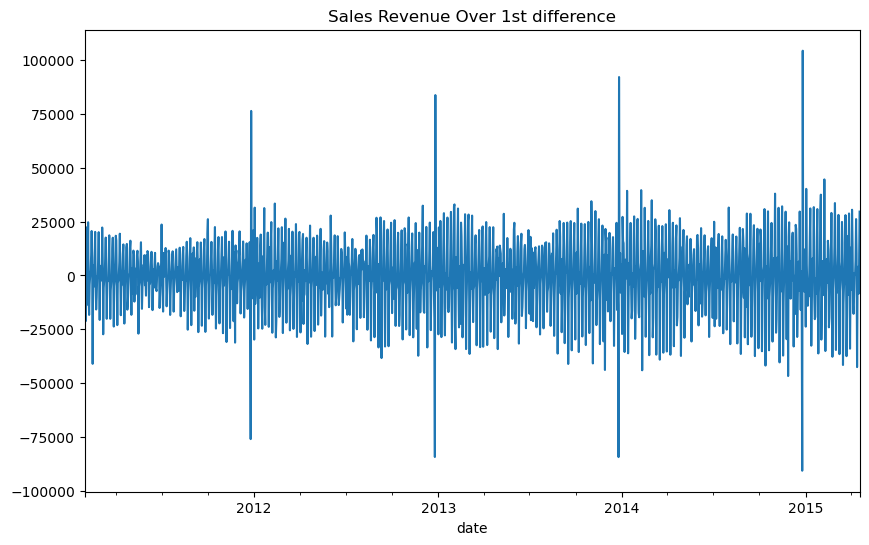

In [28]:
# Plot the revenue data with a specified figure size
df_train_data['revenue first difference'].plot(figsize=(10, 6))
plt.title('Sales Revenue Over 1st difference')
plt.show()

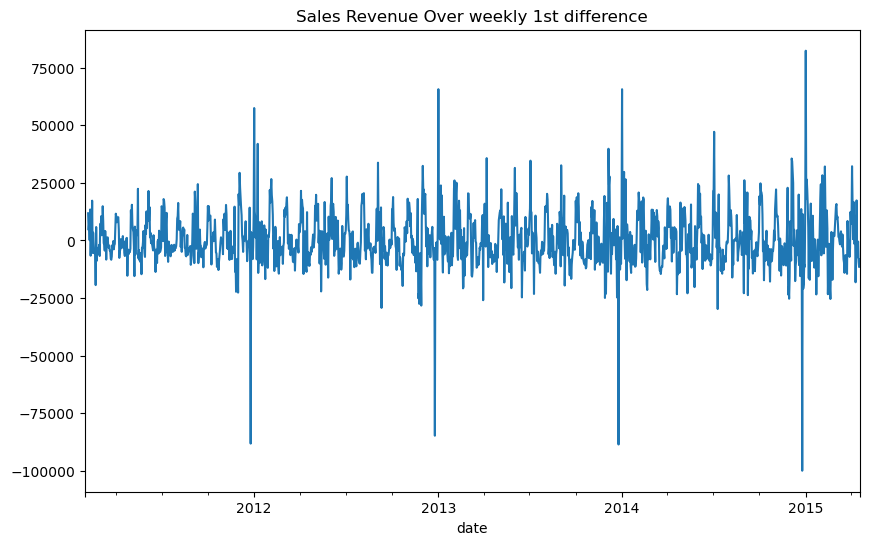

In [29]:
# Plot the revenue data with a specified figure size
df_train_data['weekly first difference'].plot(figsize=(10, 6))
plt.title('Sales Revenue Over weekly 1st difference')
plt.show()

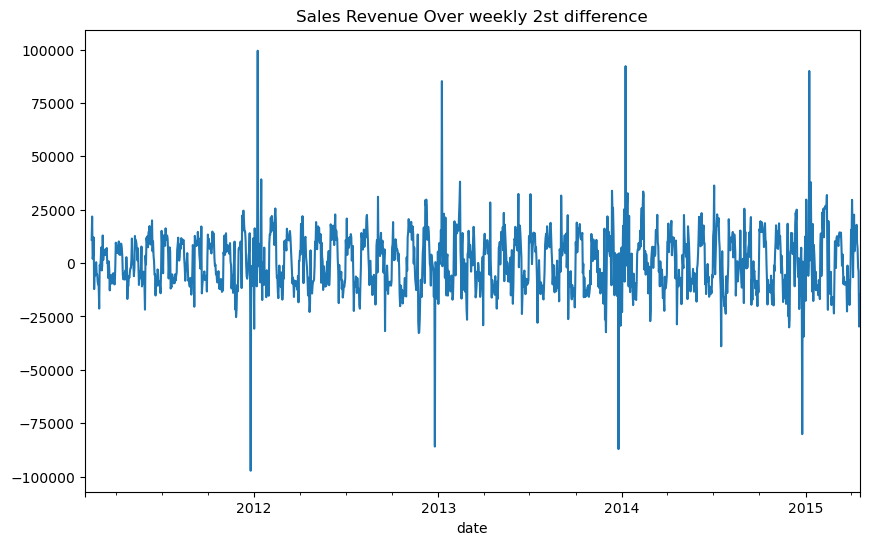

In [30]:
# Plot the revenue data with a specified figure size
df_train_data['weekly second difference'].plot(figsize=(10, 6))
plt.title('Sales Revenue Over weekly 2st difference')
plt.show()

## Plotting ACF and PACF

In [36]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

### First Difference 

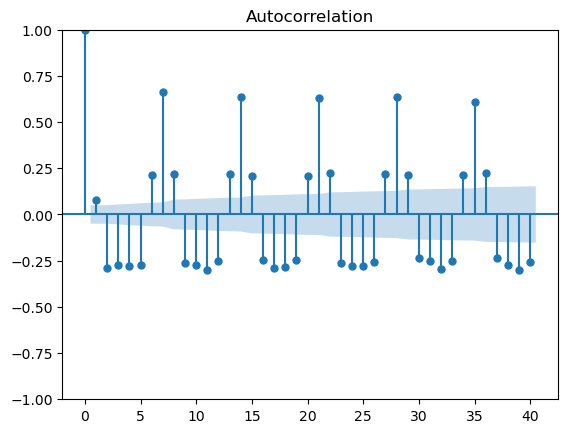

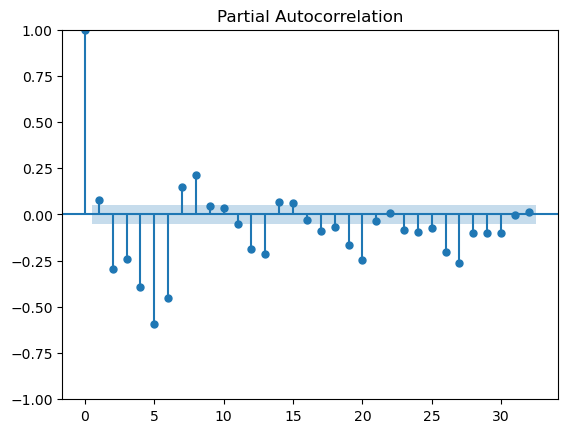

In [37]:
acf = plot_acf(df_train_data["revenue first difference"].dropna(), lags=40)
pacf = plot_pacf(df_train_data["revenue first difference"].dropna())

### Weekly first difference

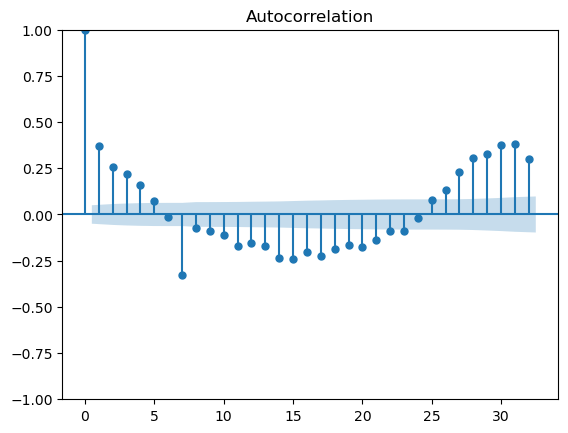

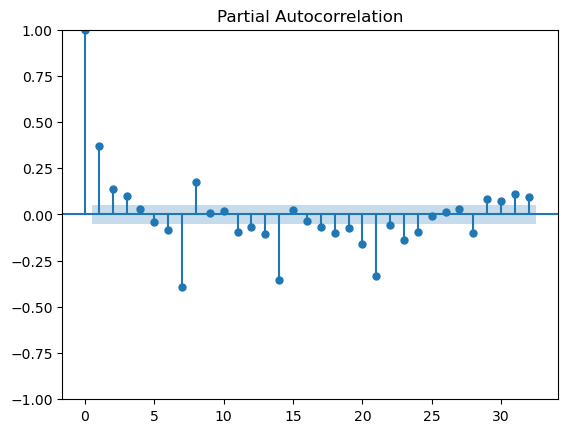

In [38]:
acf7 = plot_acf(df_train_data["weekly first difference"].dropna())
pacf7 = plot_pacf(df_train_data["weekly first difference"].dropna())

### Weekly second difference

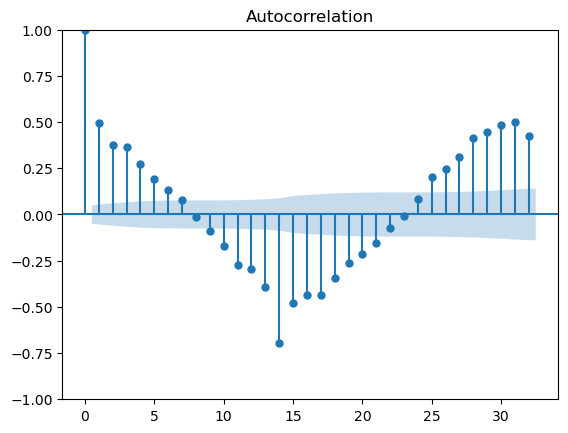

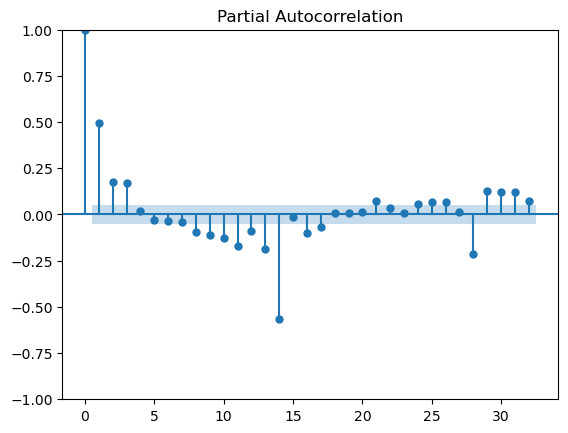

In [40]:
acf14 = plot_acf(df_train_data["weekly second difference"].dropna())
pacf14 = plot_pacf(df_train_data["weekly second difference"].dropna())

### Testing Set

In [41]:
df_test_data['revenue first difference'] = df_test_data['revenue'] - df_test_data['revenue'].shift(1)

df_test_data['revenue'].shift(1)

df_test_data.head()

,revenue,revenue first difference
date,,
2015-04-19,141758.65,NaN
2015-04-20,105781.23,-35977.42
2015-04-21,96606.05,-9175.18
2015-04-22,95237.65,-1368.40
2015-04-23,96460.08,1222.43


In [42]:
# Dickey-Fuller test 
adfuller_test(df_test_data['revenue first difference'].dropna())

ADF Test Statistic : -7.420992204547855
p-value : 6.737284586207899e-11
#Lags Used : 13
Number of Observations Used : 385
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Modelling

In [43]:
#import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [44]:
# create a SARIMA Model
model_SARIMA = SARIMAX(df_train_data['revenue first difference'], order=(5, 3, 2), seasonal_order=(1, 1, 1, 7))

C:\Users\saumy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\saumy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [45]:
# fit the SARIMA model
model_SARIMA_fit=model_SARIMA.fit()

In [46]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:            revenue first difference   No. Observations:                 1541
Model:             SARIMAX(5, 3, 2)x(1, 1, [1], 7)   Log Likelihood              -16675.409
Date:                             Tue, 10 Oct 2023   AIC                          33370.819
Time:                                     19:14:39   BIC                          33424.155
Sample:                                 01-29-2011   HQIC                         33390.668
                                      - 04-18-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2884      0.052    -24.671      0.000      -1.391      -1.186
ar.L2         -1.2869      0.096    -13.347      0.000      -1.476      -1.098
ar.L3         -1.0469      0.127     -8.258      0.000      -1.295      -0.798
ar.L4         -0.6897      0.120     -5.728      0.000      -0.926      -0.454
ar.L5         -0.3380      0.071     -4.767      0.000      -0.477      -0.199
ma.L1         -1.9894      0.054    -36.771      0.000      -2.095      -1.883
ma.L2          0.9912      0.057     17.264      0.000       0.879       1.104
ar.S.L7        0.3707      0.080      4.621      0.000       0.213       0.528
ma.S.L7       -0.9988      0.034    -28.975      0.000      -1.066      -0.931
sigma2      3.271e+08    5.3e-10   6.17e+17      0.000    3.27e+08    3.27e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):             19922.65
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.97e+33. Standard errors may be unstable.
"""

In [52]:
import joblib

# Define the full path to the joblib file, including the directory structure
file_path = 'C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/models/forecasting'

from joblib import dump


# Save the SARIMA model to the specified file path
dump(model_SARIMA_fit, file_path + '/SARIMA_model.joblib', compress = 9)

['C:/Users/saumy/OneDrive/Desktop/Semester-3/AdvMLA/AdvMLA_AT2/models/forecasting/SARIMA_model.joblib']

In [587]:
# Make predictions for a future period 
forecast_start_date = df_train_data.index.max() + pd.DateOffset(days=1)
forecast_end_date = forecast_start_date + pd.DateOffset(days=398)
forecast = model_SARIMA_fit.get_forecast(steps=399)

# Get the predicted values and associated confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a date range for the forecasted period
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date)

# Create a DataFrame to store the forecast values and confidence intervals
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Revenue': forecast_values.values
})

# Print or use the forecasted DataFrame as needed
print(forecast_df)

          Date  Forecasted Revenue
0   2015-04-19        -5519.997399
1   2015-04-20       -29962.521340
2   2015-04-21        -8750.735644
3   2015-04-22        -3108.356573
4   2015-04-23        -4600.277745
..         ...                 ...
394 2016-05-17      -538284.874744
395 2016-05-18      -534719.039507
396 2016-05-19      -536533.635866
397 2016-05-20      -528030.239877
398 2016-05-21      -522152.669947

[399 rows x 2 columns]


In [588]:
predicted_values = forecast_df['Forecasted Revenue']

# Print  the values from the second column 
print(predicted_values)

0       -5519.997399
1      -29962.521340
2       -8750.735644
3       -3108.356573
4       -4600.277745
           ...      
394   -538284.874744
395   -534719.039507
396   -536533.635866
397   -528030.239877
398   -522152.669947
Name: Forecasted Revenue, Length: 399, dtype: float64


In [589]:
# Remove NA values from the 'revenue' column in df_test_data
df_test_data.dropna(subset=['revenue first difference'], inplace=True)


In [590]:

# Convert the forecasted values to a NumPy array
predicted_values = forecast_df['Forecasted Revenue'].head(7).values

# Extract the actual test values and drop NaN values
df_first_7 = df_test_data['revenue first difference'].dropna().head(7).values

from sklearn.metrics import mean_squared_error
# Calculate RMSE
mse = mean_squared_error(df_first_7, predicted_values)
rmse = np.sqrt(mse)

# Print or use the RMSE as needed
print("Root Mean Squared Error (RMSE):", rmse)



Root Mean Squared Error (RMSE): 18985.852102985493


<Axes: xlabel='date'>

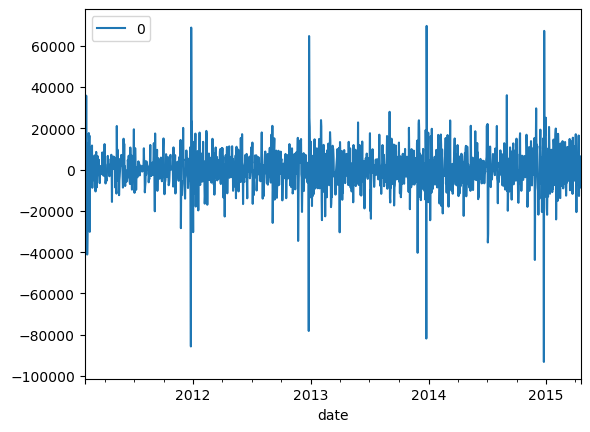

In [591]:
# Assuming model_fit is a valid fitted time series model
import pandas as pd
# line plot of residuals
# Calculate residuals and store them in a DataFrame
# Calculate residuals and store them in a DataFrame
residuals = pd.DataFrame(model_SARIMA_fit.resid)
residuals.plot()


In [592]:
# summary stats of residuals
print(residuals.describe())

                  0
count   1540.000000
mean       7.325828
std    10346.505377
min   -93203.637494
25%    -5007.871122
50%     -137.842460
75%     5207.530369
max    69608.527491


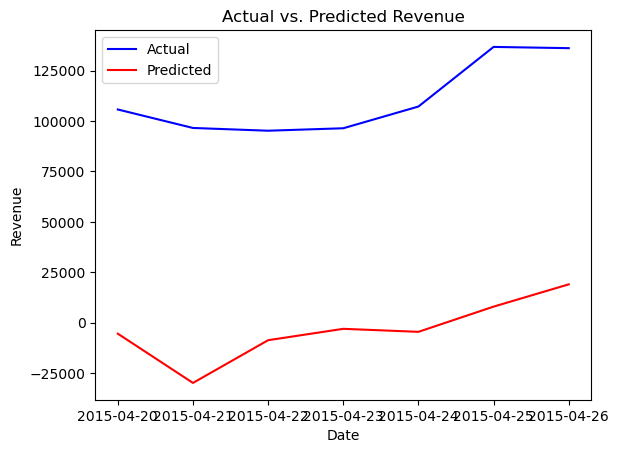

In [593]:
# Ensure both series have the same length
df_test_data = df_test_data.head(len(predicted_values))

# Plot the actual values from the test set
plt.plot(df_test_data.index, df_test_data['revenue'], label='Actual', color='blue')

# Plot the predicted values
plt.plot(df_test_data.index, predicted_values, label='Predicted', color='red')

# Set plot labels and legend
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs. Predicted Revenue')
plt.legend()

# Show the plot
plt.show()


In [594]:
# Define the number of days to forecast (7 days)
forecast_days = 7

# Use the 'forecast' method to make predictions for the next 7 days
forecast = model_SARIMA_fit.get_forecast(steps=forecast_days)

# Get the predicted values and the associated confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Print or use the forecasted values and confidence intervals as needed
print("Forecasted Values:")
print(forecast_values)

# Print Confidence Intervals (if needed)
print("Confidence Intervals:")
print(confidence_intervals)


Forecasted Values:
2015-04-19    -5519.997399
2015-04-20   -29962.521340
2015-04-21    -8750.735644
2015-04-22    -3108.356573
2015-04-23    -4600.277745
2015-04-24     7912.784282
2015-04-25    18968.835026
Freq: D, Name: predicted_mean, dtype: float64
Confidence Intervals:
            lower revenue first difference  upper revenue first difference
2015-04-19                   -41025.399971                    29985.405173
2015-04-20                   -66812.494238                     6887.451558
2015-04-21                   -45751.356811                    28249.885523
2015-04-22                   -40974.293604                    34757.580457
2015-04-23                   -43422.298428                    34221.742939
2015-04-24                   -31713.021856                    47538.590420
2015-04-25                   -21917.196060                    59854.866112


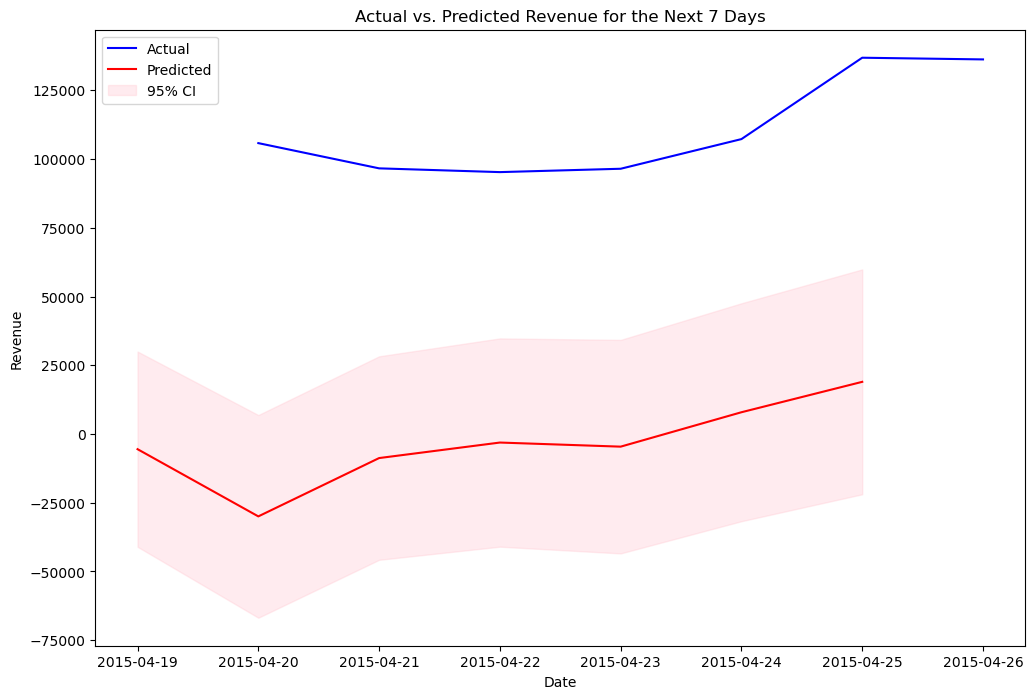

In [595]:
import matplotlib.pyplot as plt

# Define the number of days to forecast (7 days)
forecast_days = 7

# Use the 'forecast' method to make predictions for the next 7 days
forecast = model_SARIMA_fit.get_forecast(steps=forecast_days)

# Get the predicted values and the associated confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a range of dates for the forecasted period
forecast_dates = pd.date_range(start=df_train_data.index[-1] + pd.DateOffset(1), periods=forecast_days, freq='D')

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot the actual values from the test set
plt.plot(df_test_data.index, df_test_data['revenue'], label='Actual', color='blue')

# Plot the predicted values
plt.plot(forecast_dates, forecast_values, label='Predicted', color='red')

# Fill the area between the confidence intervals
plt.fill_between(forecast_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='95% CI')

# Set plot labels and legend
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs. Predicted Revenue for the Next 7 Days')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pmdarima as pm
import pandas as pd



# If you want to drop rows with missing values (be cautious about data loss):
df_train_data.dropna(inplace=True)

# Now, you can proceed with SARIMA modeling using the cleaned data
# ...

# Define the range of values to search for p, d, q, P, D, Q, and seasonal period (S)
p_values = range(0, 3)  # Reduced range for simplicity
d_values = range(0, 2)  # Reduced range for simplicity
q_values = range(0, 3)  # Reduced range for simplicity
P_values = range(0, 2)  # Reduced range for simplicity
D_values = range(0, 2)  # Reduced range for simplicity
Q_values = range(0, 2)  # Reduced range for simplicity
s_values = [7]  # Seasonal period

# Initialize variables to store best parameters and RMSE
best_rmse = float('inf')
best_params = None

# Loop through possible combinations of parameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in s_values:
                            # Use pmdarima's auto_arima function to find the best model
                            model = pm.auto_arima(df_train_data['weekly second difference'],
                                                  seasonal=True, m=s,
                                                  stepwise=True, trace=True,
                                                  suppress_warnings=True,
                                                  error_action="ignore",
                                                  max_order=None)
                            
                            # Get the best RMSE from the auto_arima results
                            rmse = model.aic()
                            
                            # Check if this combination of parameters gives a lower RMSE
                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_params = (model.order, model.seasonal_order)

# Print the best parameters and RMSE
print("Best SARIMA Parameters:", best_params)
print("Best AIC (RMSE):", best_rmse)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=33450.249, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=33024.336, Time=0.46 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=33449.775, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=33026.283, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=32458.218, Time=10.76 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=32460.189, Time=6.06 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=32378.828, Time=12.94 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=33442.643, Time=0.28 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=32689.563, Time=6.41 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=32573.309, Time=3.55 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC

 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=4.23 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=33450.249, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=33024.336, Time=0.67 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=2.05 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=33449.775, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=33026.283, Time=0.13 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=32458.218, Time=15.72 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=32460.189, Time=8.63 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=32378.828, Time=18.72 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=33442.643, Time=0.38 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=32689.563, Time=9.08 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=32573.309, Time=5.34 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=32426.704, Time=8.70 sec
 ARIMA(0,0,0)(2,0

 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=4.11 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=33450.249, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=33024.336, Time=0.68 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=33449.775, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=33026.283, Time=0.12 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=32458.218, Time=16.01 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=32460.189, Time=5.83 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=32378.828, Time=18.82 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=33442.643, Time=0.38 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=32689.563, Time=9.40 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=2.09 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=32573.309, Time=5.25 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=32426.704, Time=8.57 sec
 ARIMA(0,0,0)(2,0

 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=4.23 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=33450.249, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=33024.336, Time=0.67 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=2.18 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=33449.775, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=33026.283, Time=0.13 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=32458.218, Time=15.71 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=32460.189, Time=8.39 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.71 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=32378.828, Time=18.88 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=33442.643, Time=0.39 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=32689.563, Time=9.32 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=2.01 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=32573.309, Time=5.22 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=32426.704, Time=8.75 sec
 ARIMA(0,0,0)(2,0

 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=4.56 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=33450.249, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=33024.336, Time=0.65 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=33449.775, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=33026.283, Time=0.13 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=32458.218, Time=15.27 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=32460.189, Time=8.46 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.94 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=32378.828, Time=18.07 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=33442.643, Time=0.35 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=32689.563, Time=9.22 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=32573.309, Time=5.23 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=32426.704, Time=8.70 sec
 ARIMA(0,0,0)(2,0

 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=4.22 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=33450.249, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=33024.336, Time=0.66 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=2.01 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=33449.775, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=33026.283, Time=0.11 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=32458.218, Time=14.52 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=32460.189, Time=5.30 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=32378.828, Time=18.89 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=33442.643, Time=0.38 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=32689.563, Time=9.31 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=32573.309, Time=5.11 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=32426.704, Time=6.34 sec
 ARIMA(0,0,0)(2,0